In [769]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression-dataset/Data4.csv
/kaggle/input/linear-regression-dataset/Data2.csv
/kaggle/input/linear-regression-dataset/Data3.csv
/kaggle/input/linear-regression-dataset/Data1.csv


In [770]:
# Importing the required module for model and for testing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math

In [771]:
# reading the dataset and making required updation to perform task
path = "/kaggle/input/linear-regression-dataset/Data1.csv"
df = pd.read_csv(path)

if path[-5] == '4':
    d = 4                                       
    df = df.drop('Sl.',axis='columns')
elif path[-5] == '3':
    d = 2
    df.rename(columns={'z':'y'}, inplace=True)
else: 
    d = 2

df.insert(0,'x0',1)

df

,x0,x,y
0,1,0.1,8.298133
1,1,0.2,4.919282
2,1,0.3,4.145139
3,1,0.4,6.850788
4,1,0.5,6.375323
...,...,...,...
95,1,9.6,28.420698
96,1,9.7,27.984652
97,1,9.8,30.336851
98,1,9.9,30.376285


In [772]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    int64  
 1   x       100 non-null    float64
 2   y       100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [773]:
# # for dataset 2 only
if path[-5]=='2':
    lst = []
    for i in df['y']:
        a = math.log(i)
        lst.append(a)
    y=lst
    print(lst)
else:
    y = df['y']

In [774]:
def Xi_vector(i):
    return np.array((df.iloc[i][:d],))

In [775]:
def Yi(k):
    return y[k]

In [776]:
Zero_vector = np.array(([0.]* d,))
Zero_matrix = Zero_vector * Zero_vector.T
Zero_matrix

array([[0., 0.],
       [0., 0.]])

In [777]:
def Xiyi():
    sum = Zero_vector.T
    for k in range(len(df)):
        sum += (Xi_vector(k).T*Yi(k))
    return sum    

In [778]:
def XiXiT():
    sum = Zero_matrix
    for k in range(len(df)):
        sum+= (Xi_vector(k).T * Xi_vector(k))
    return sum

In [779]:
matrix = np.linalg.pinv(XiXiT())
matrix

array([[ 0.04060606, -0.00606061],
       [-0.00606061,  0.00120012]])

In [780]:
W = matrix@Xiyi()
W

array([[5.68078713],
       [2.38406007]])

In [781]:
def y_prediction(w):
    y_pred = []
    for k in range(len(df)):
        a = w.T@Xi_vector(k).T
        y_pred.append(a[0])
    return y_pred

In [782]:
y_pred = y_prediction(W)

In [783]:
# # for dataset 2 only
if path[-5]=='2':
    lst=[]
    for i in y_pred:
        a = math.exp(i[0])
        lst.append(a)
    y_pred=lst

In [784]:
def MSE(y, y_pred):
    error = 0
    for i, j in zip(y, y_pred):
        error += (i - j)**2
    return error/len(y)
        
def MAE(y, y_pred):
    error = 0
    for i, j in zip(y, y_pred):
        error += abs(i - j)
    return error/len(y)

def RMSE(y):
    return y**0.5

def R_square(y, y_pred):
    sum1 = 0
    y_bar = 0
    for i in y:
        y_bar += i
    y_bar = y_bar/(len(y))
    
    for i in y:
        sum1 += (i-y_bar)**2
    R = 1 - (MSE(y, y_pred)/(sum1/len(df)))
    return R

In [785]:
print(MSE(df['y'], y_pred), "mean square error")
print(RMSE(MSE(df['y'], y_pred)), "root mean square error")
print(MAE(df['y'], y_pred), "mean absolute error")
print(R_square(df['y'], y_pred),"R square value")

[2.0785254] mean square error
[1.44170919] root mean square error
[1.28055598] mean absolute error
[0.95795719] R square value


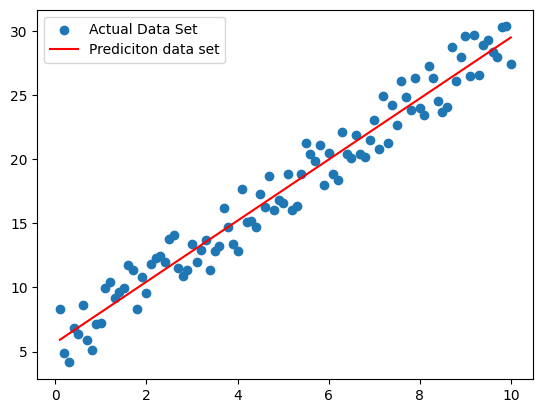

In [786]:
if path[-5] != '4':
    plt.scatter( df['x'] , df['y'], label = 'Actual Data Set') 
    plt.plot( df['x'], y_pred, label = 'Prediciton data set', color = 'red' )
    plt.legend()
    plt.show()

In [787]:
if path[-5] == '4':
    x_train = df[['x1','x2','x3']]
else:
    x_train = df[['x']]
y_train = df['y']

In [788]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [789]:
o = lr.predict(x_train)

In [790]:
mse = mean_squared_error(df['y'], y_pred)
mse

2.0785254017773265

In [791]:
mae = mean_absolute_error(df['y'], y_pred)
mae

1.2805559784291458

In [792]:
r2 = r2_score(df['y'], y_pred)
r2

0.9579571905586357

In [793]:
rmse = np.sqrt(mse)
rmse

1.4417091945941547

In [794]:
def gradientDescent(eta):
    gradient = 0
    w_old = np.array(([0.0]*d,))
    for _ in range(34):
        for i in range(len(df)):
            gradient += ((Yi(i) - Xi_vector(i)@w_old.T)*(-Xi_vector(i)))
        w = w_old - eta*(gradient * (2/len(df)))
        w_old = w
    return w

In [795]:
gradientDescent(0.005)

array([[6.40446407, 2.86823557]])